Score: 0.999999971315096
       Score  Predicted Scores
0          2          2.000074
1          1          1.000244
2          3          2.999905
3          4          3.999736
4          1          1.000244
...      ...               ...
43398      1          1.000244
43399      1          1.000244
43400      3          2.999905
43401      3          2.999905
43402      1          1.000244

[43403 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


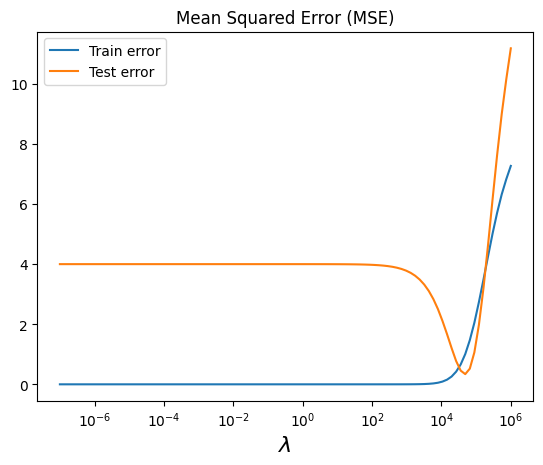

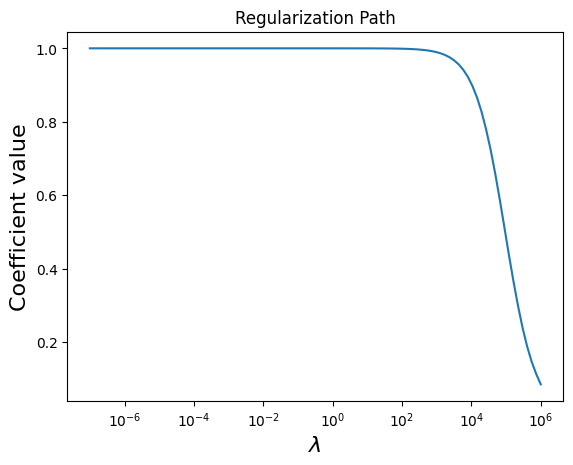

In [10]:
import pandas as pd
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#Define Ridge Regression Functions

def loss_fn(X, y, beta):
    return cp.pnorm(cp.matmul(X, beta) - y, p=2)**2

def regularizer(beta):
    return cp.pnorm(beta, p=2)**2

def objective_fn(X, y, beta, lambd):
    return loss_fn(X, y, beta) + lambd * regularizer(beta)

def mse(X, y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, y, beta).value

amazon = pd.read_csv('amazon_reviews_cleaned_dataset.csv')
df = pd.DataFrame(amazon)
X = amazon['score'].values.reshape(-1, 1)
y = amazon['score'].values.reshape(-1, 1)

#Create Test Train Splits.


regressor = Ridge(alpha=5.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=60)

#Fit into agressor

regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

#Calculate predicted scores

score = regressor.score(X_test, y_test)
df = pd.DataFrame({'Score': y_test.flatten(), 'Predicted Scores': y_pred.flatten()})

#Align dimensions of the array

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print('Score:', score)
print(df)


n = X_train.shape[1]
beta = cp.Variable((n,1))
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, y_train, beta, lambd)))

lambd_values = np.logspace(-7, 6, 100)
train_errors = []
test_errors = []
beta_values = []


for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, y_train , beta))
    test_errors.append(mse(X_test +3 , y_test +1, beta))
    beta_values.append(beta.value)

def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

def plot_regularization_path(lambd_values, beta_values):
    num_coeffs = len(beta_values[60])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in beta_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.ylabel("Coefficient value", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, beta_values)